## Lab 1: AI Travel Assistant Use Case Introduction



### Introduction

In this first Lab, we will introduce the AI Travel Assistant use case, discuss the data sources, core features of AI Agents with Bedrock and Open Source Agent Framework LangChain and set up the packages and dependencies that is required for the rest of the Labs.

The use case is to help create a bot which 
- FFind `My Dream Destination` which finds similiar destinations based on the user preferences using `RAG`
- Can `book travel` including hotel and flight
- Leverages `Tools` to exeute the actions
- Asks for `Human Confirmation` for critical exeution flows




### Use Case

Imagine having an AI assistant that can help you plan your next vacation, catering to all your preferences and needs. That's exactly what our "AI Travel Assistant" does—a cutting-edge, agentic AI system built using LangGraph and Amazon Bedrock Models. This assistant is designed to make travel planning seamless, offering personalized and data-driven suggestions every step of the way.

We will cover following scenarios in this workshop

1. **Lab 2: Introduction to the concepts of Agents including building blocks for LangGrah and ReACT agents. We will introduce memory concepts in this lab to show how to have 'Multi-Turn' conversations. We will show short term and long term memory:** 

Understand what it takes to build a agentic system.

2. **Lab 3: Dream Destination Planning with Introduction of RAG to the pipeline for Customized Travel Itineraries. We will show different types of Agents incuding concepts like 'Human-In-The-Loop': We will also introduce Multi-Modal concept in this lab** 

Get personalized recommendations for your next dream destination. Create vacation plans tailored specifically to your preferences and based on your past travels.

3. **Lab 4: Multi-Agent colloboration. We will leverage all the work from the previous labs and then assemble the building blocks to create a multi agent colloboration. We will use Similar Travelers Based Recommendations, book hotels and flights:** 

Receive recommendations influenced by the preferences of travelers in a similar age group and geographic location.Book, modify, and cancel flight and hotel reservations—all through one assistant.

4. **Lab 5: [Optional] Dream Destination with crew.ai for comparisions:** 

Book, modify, and cancel flight and hotel reservations—all through one assistant.

5. **Lab 6: Agentic Evaluation with RAGAS:** 

Understand how to evaluate the Agentic workflows using the open soyrce RAGAS library.


The diagram will be similiar to this below

<img src="./images/travel_agent_light.png" width="65%" alt='travel_agent_light.png'/> 

### Dataset

Introduction to the data set we wil be using for this workshop

#### 1. Travel History: 

We have synthetically created travel history dataset we will levearge in this workshop, it contains following fields

- Name: The individual's full name.
- Current_Location: The city where the individual currently resides.
- Age: The individual's age in years.
- Past_Travel_Destinations: Cities the individual has previously visited, listed as comma-separated values.
- Number_of_Trips: The total count of trips the individual has taken.
- Flight_Number: The flight number associated with each trip taken.
- Departure_City: The city from which each flight departed.
- Arrival_City: The destination city for each flight.
- Flight_Date: The date of each flight taken.

In [13]:
import pandas as pd

df = pd.read_csv("./data/synthetic_travel_data.csv")
df.head(10)

,Id,Name,Current_Location,Age,Past_Travel_Destinations,Number_of_Trips,Past_Travel_Destinations.1,Number_of_Trips.1,Flight_Number,Departure_City,Arrival_City,Flight_Date
0,24.0,Philip Cook,Zurich,29.0,Ljubljana,1.0,Ljubljana,1.0,Z1823,Zurich,Ljubljana,2024-10-11
1,918.0,Andrew Macdonald,Paris,62.0,"Lisbon, Lisbon, Bergen, Paris, Warsaw",5.0,"Lisbon, Lisbon, Bergen, Paris, Warsaw",5.0,O1142,Paris,Lisbon,2024-10-21
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U7234,Paris,Lisbon,2024-03-23
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H9041,Paris,Bergen,2024-03-25
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y7505,Paris,Paris,2023-09-13
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X8568,Paris,Warsaw,2023-05-17
6,709.0,Jonathan Garcia,Sacramento,43.0,New York,1.0,New York,1.0,P8336,Sacramento,New York,2023-07-10
7,314.0,Wendy Yu,Moscow,34.0,"Prague, Valencia, Reykjavik, London",4.0,"Prague, Valencia, Reykjavik, London",4.0,P6922,Moscow,Prague,2023-01-02
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I1305,Moscow,Valencia,2024-05-26
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S2309,Moscow,Reykjavik,2023-04-14


#### 2. US and Europe City Dataset

For the purpose of the Retrieval Augmented generation(RAG) demonstrations in the labs, we have synthetically created PDF datasets to be ingested in the Vector DBs. Following is a sample PDF organises in `/data/us` and `/data/europe` folders respectively. We have used an Agentic implementation to create the dataset. You can check this out in the optional notebook provided

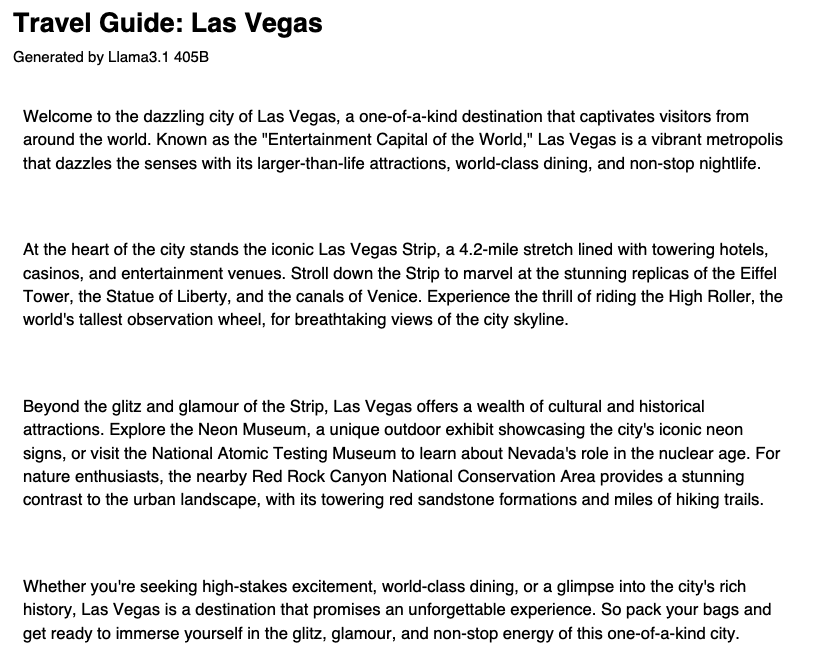

In [14]:
from IPython.display import Image
Image(filename='./images/vegas.png') 

### Amazon Bedrock Model Access

[Amazon Bedrock](https://aws.amazon.com/bedrock/) offers a variety of foundation models (FMs) that are optimized for different use cases, making it a versatile platform for building generative AI applications. For agentic workflows, where models interact with tools, make decisions, and carry out complex tasks autonomously, choosing the right FM is crucial. For the purposes of this demostration, we will use the foundational models available on Amazon Bedrock with a focus on Anthropic Claude, Meta’s models, and Amazon’s own models, highlighting their capabilities for demonstration purposes. You can take a look [Supported foundation models in Amazon Bedrock](https://docs.aws.amazon.com/bedrock/latest/userguide/models-supported.html)

In [15]:
import boto3

region = 'us-east-1'
bedrock = boto3.client(
    service_name = 'bedrock-runtime',
    region_name = region,
)

#### Anthropic's Claude in Amazon Bedrock

The `langchain_aws` package is a tool for integrating and interacting with Amazon Bedrock's language models through the LangChain framework. It provides following benefits

- Simplified Access to Amazon Bedrock Models
- Support for Conversational AI and Agentic Workflows

- `from langchain_aws.chat_models.bedrock:` This imports the ChatBedrock class from the langchain_aws package, specifically from the chat_models module.
- `ChatBedrock:` This is a class that allows interaction with Amazon Bedrock’s chat models, enabling users to create conversational AI applications using different foundational models available on Bedrock.

Refer [Anthropic's Claude in Amazon Bedrock](https://aws.amazon.com/bedrock/claude/) for more details

### Converse API

<img src="./images/converse_api.png" width="40%" alt=" conver api simplifies" />

In [ ]:
%pip install -U --no-cache-dir  \
"langchain==0.3.7" \
"langchain-aws==0.2.6" \
"langchain-community==0.3.5" \
"langchain-text-splitters==0.3.2" \
"langchainhub==0.1.20" \
"langgraph==0.2.45" \
"langgraph-checkpoint==2.0.2" \
"langgraph-sdk==0.1.35" \
"langsmith==0.1.140" \
"pypdf==3.8,<4" \
"ipywidgets>=7,<8" \
"matplotlib==3.9.0" \
"faiss-cpu==1.8.0"

%pip install -U --no-cache-dir boto3
#%pip install grandalf==3.1.2

In [18]:
from langchain_aws.chat_models.bedrock import ChatBedrock
from rich.console import Console
from rich.text import Text

# Create a console object
console = Console()

modelId = 'anthropic.claude-3-haiku-20240307-v1:0'
llm = ChatBedrock(
    model_id=modelId,
    client=bedrock,
    beta_use_converse_api=True
)


response = llm.invoke("I am planning a trip  with my family to Hawai next summer, can you give me a travel iternary for 5 days").content
# Format the text as a rich Text object
formatted_text = Text.from_markup(response)

# Print the formatted response using rich
console.print(formatted_text)

Certainly! Here's a suggested 5-day travel itinerary for a trip to Hawaii:

Day 1:
- Arrive at the Honolulu International Airport on the island of Oahu
- Check-in to your hotel or resort
- Explore Waikiki Beach and its lively shops, restaurants, and beachfront
- Visit the iconic Diamond Head State Monument for a scenic hike

Day 2:
- Take a day trip to the island of Maui
- Visit the stunning Haleakala National Park and watch the sunrise (or sunset) from the summit
- Explore the lush Iao Valley State Park
- Enjoy the charming town of Lahaina with its historic sites and art galleries

Day 3:
- Spend the day exploring the island of Oahu
- Visit the Pearl Harbor National Memorial and learn about the history of the attack
- Explore the North Shore, known for its giant waves, surfing culture, and the Dole Pineapple Plantation
- Stop at the Banzai Pipeline to watch the surfers (during the winter months)

Day 4:
- Take a day trip to the island of Kauai
- Hike the Napali Coast or take a boat tour to witness its dramatic cliffs and waterfalls
- Explore the Waimea Canyon, often referred to as the "Grand Canyon of the Pacific"
- Relax on the beautiful beaches of Poipu or Princeville

Day 5:
- Spend the day in Honolulu
- Visit the iconic Iolani Palace, the only royal palace in the United States
- Explore the Bernice Pauahi Bishop Museum, which showcases the rich cultural heritage of Hawaii
- Enjoy a sunset dinner or luau experience to cap off your Hawaiian adventure

Remember, this is just a suggested itinerary, and you can adjust it to fit your interests and travel preferences. 
Additionally, be sure to factor in time for relaxation, exploring local cuisine, and enjoying the stunning natural 
beauty that Hawaii has to offer.

### Course-grained model comparison

In this section, we experiment with multiple models available on Amazon Bedrock and run course-grained evaluation on one of our task of interest. With the thousands of available models on the market, it is intractable to evaluation every single one. Hence, it is generally necessary to pre-filter for the ones that are not only from trusted providers, but have shown strong performance on a variety of benchmarks. 

Amazon Bedrock allows you to make a quick short-list by supporting a growing list providers such as Anthropic, Meta, Mistral, Cohere, AI21Labs, Stability AI and Amazon. This lets you start with a strong base to continue the model selection process.

Next we perform course-grained model evalution on the following models to inform our initial choice of model for our task of interest:
- Anthropic: Claude 3 Haiku

For this workshop we have access to 1 model only. Ideally in your own accounts you can use multiple models to run this evaluation.

To perform an initial evaluation, we create a small curated dataset of 10 examples. The optimal initial number of examples should be sufficiently big to roughly cover the types of queries our customers will send our model. Since this stage of the model evaluation process is meant to get a rough idea, the number of examples can be small.

To start, our scenario can be described by summarization (**task**) of vacation destinations (**what**) asked by travelers (**who**) at the time of development (**when**) in English (**language**). The set of initial questions can be found in [examples.txt](./data/examples.txt). We could expand our test by changing one or more of the variables composing the scenario of interesting. For instance, we could generate equivalent examples, but asked by people who aren't travelers or by others speaking in any other languages.

In [ ]:
with open("./data/examples.txt", "r") as file:
    examples = file.read().splitlines()

In [ ]:
import pandas as pd
from langchain_core.messages import HumanMessage, SystemMessage
from rich.console import Console
from rich.text import Text

pd.set_option('display.max_colwidth', None)
# Create a console object
console = Console()


def generate_answers(
    examples: list = [],
    system_prompt: SystemMessage = None
):
    modelIds = [
        "anthropic.claude-3-haiku-20240307-v1:0",
    ]
    output = pd.DataFrame({
        'example': [],
        'Claude3Haiku': [],
    })
    for example in examples:
        results = [example]
        for modelId in modelIds:
            messages = [
                system_prompt if system_prompt else SystemMessage(content=""),
                HumanMessage(content=example)
            ]
            llm = ChatBedrock(
                model_id=modelId,
                client=bedrock,
                beta_use_converse_api=True
            )
            resp = llm.invoke(messages).content
            results.append(resp)
        output.loc[len(output)] = results
    return output

In [ ]:
one_example = examples
output = generate_answers(one_example)
output.head()

### Conclusion

In this notebook, we established 
- the use case scope of the labs covered in this workshop
- datasets we will be using all the labs
- Amazon bedrock models used in this

Please proceed to the next labs